# Datos sintéticos con K-means

- author: Virginia Ordoño Bernier 
- April 2024

Utiliza el algoritmo K-Means para agrupar los datos del fichero synthetic_data1.csv y visualiza los resultados gráficamente.

- Averigua el número de clusters óptimo utilizando Elbow y BIC.
- Visualiza los resultados utilizando un gráfico de dispersión. Cada punto en el gráfico debe ser coloreado de acuerdo con el cluster al que pertenece.
- Comprueba si este resultado coincide con la agrupación real que puedes encontrar en el fichero synthetic_data1_with_labels.csv. 

## 1. Carga de datos local

In [58]:
import sys
sys.path.append('./')
from my_utils import *

import pandas as pd # type: ignore

data_csv = '../data/synthetic_data1.csv'
df = pd.read_csv(data_csv)

data_labelled_csv = '../data/synthetic_data1_with_labels.csv'
df_labelled = pd.read_csv(data_labelled_csv)
df.head()

,x,y
0,7.933768,3.681179
1,4.760600,7.518566
2,2.257447,1.617497
3,2.960558,1.805772
4,1.582530,1.588611


### 1.1. Renombramos 'class' a 'cluster' porque es palabra reservada

In [59]:
df_labelled.rename(columns={'class': 'cluster'}, inplace=True)
df_labelled['cluster'] = df_labelled['cluster'].astype(int)
df_labelled.head()

,x,y,cluster
0,7.933768,3.681179,2
1,4.760600,7.518566,3
2,2.257447,1.617497,1
3,2.960558,1.805772,1
4,1.582530,1.588611,1


In [60]:
df_labelled.cluster.unique()

array([2, 3, 1])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


## 2. Visualización de la distribución de los datos

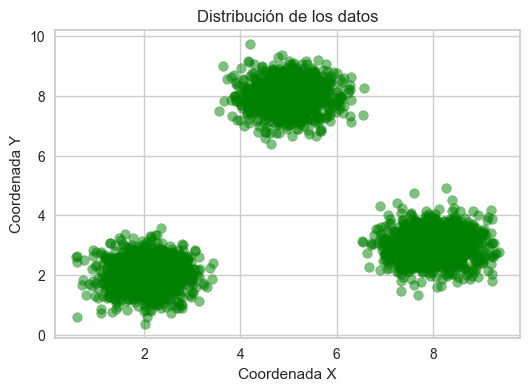

In [62]:
import matplotlib.pyplot as plt # type: ignore

plt.figure(figsize=(6, 4))
plt.scatter(df['x'], df['y'], color='green', alpha=0.5)  

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Distribución de los datos')

plt.grid(True)
plt.show()

## 3. Gráficos BIC y Elbow

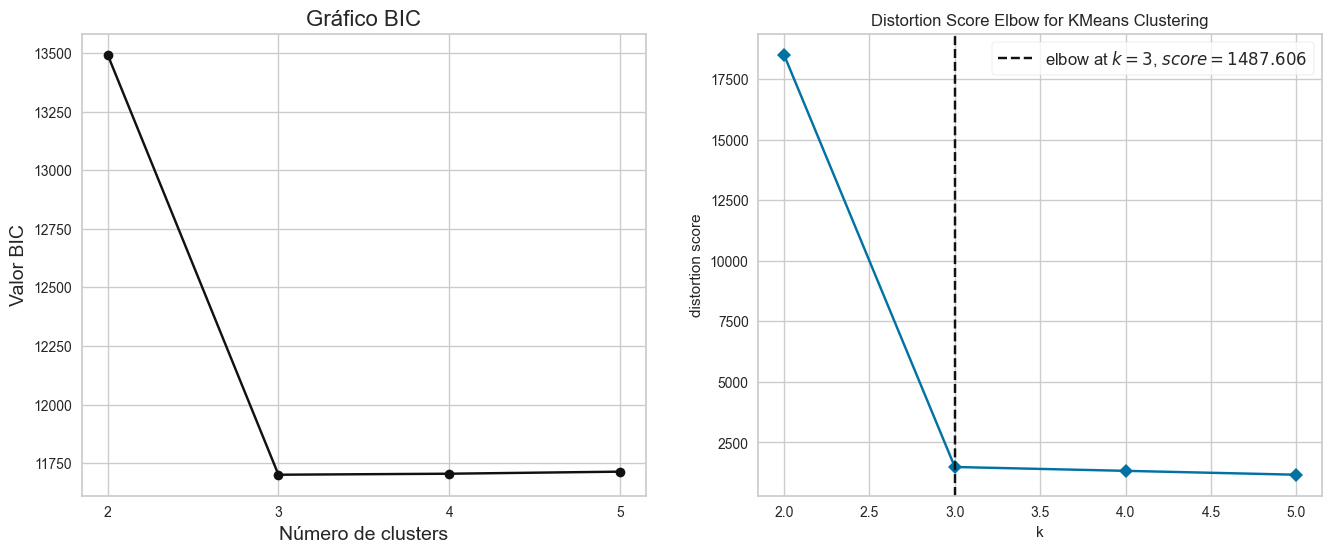

<Figure size 800x550 with 0 Axes>

Mejor k según BIC: 3
Mejor k según Elbow: 3


In [63]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.cluster import KMeans # type: ignore
from yellowbrick.cluster import KElbowVisualizer # type: ignore

bic_array = []
K_MAX = 5
K_MIN = 2
N_INIT = 20
RANDOM_STATE= 42

for k in range(K_MIN, K_MAX+1):
    model_bic = KMeans(n_clusters=k, n_init=N_INIT, random_state=RANDOM_STATE)
    groups_bic = model_bic.fit_predict(df)
    bic_array.append(get_bic_values(k, groups_bic, df.values))
        
# Visualización de los resultados con BIC 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(np.arange(K_MIN, K_MAX+1), bic_array, "ko-")
ax1.set_xticks(range(K_MIN, K_MAX+1))
ax1.set_title("Gráfico BIC", fontsize=16)
ax1.set_xlabel("Número de clusters", fontsize=14)
ax1.set_ylabel("Valor BIC", fontsize=14)

# Visualización de los resultados con Elbow Method
elbow_method = KElbowVisualizer(KMeans(random_state=RANDOM_STATE), k=K_MAX, timings=False)
elbow_method.fit(df)
elbow_method.show()

plt.tight_layout()
plt.show()

# Leyendas

# Obtiene el número óptimo de clusters según el método BIC
k_bic = np.argmin(bic_array) + K_MIN

# Obtiene el número óptimo de clusters según el método del codo
k_elbow = elbow_method.elbow_value_

print(f"Mejor k según BIC: {k_bic}")
print(f"Mejor k según Elbow: {k_elbow}")

## 4. Modelo K-means con los mejores parámetros

In [64]:
model = KMeans(n_clusters=k_bic, n_init=10, random_state=100, verbose=1)
groups = model.fit_predict(df)

Initialization complete
Iteration 0, inertia 3584.198567582207.
Iteration 1, inertia 1487.6063432075096.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3167.9261949431534.
Iteration 1, inertia 1487.6063432075098.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2141.166170101202.
Iteration 1, inertia 1487.6063432075096.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2243.0332861785123.
Iteration 1, inertia 1487.6063432075098.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3351.132768221374.
Iteration 1, inertia 1487.6063432075098.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2804.531409801031.
Iteration 1, inertia 1487.6063432075098.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2119.7205164569955.
Iteration 1, inertia 1487.6

### 4.1. Cálculo de la inertia y los centroides

In [65]:
print(f"\nInertia: {model.inertia_}\n")

centroids = model.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns[:model.cluster_centers_.shape[1]])
centroids_df['cluster'] = range(centroids.shape[0])

print("Centroides:")
print("-"*15)
centroids_df



Inertia: 1487.6063432075096

Centroides:
---------------


,x,y,cluster
0,5.012968,7.999656,0
1,2.019404,2.006815,1
2,8.014943,2.996925,2


## 5. Visualización modelo Kmeans vs. datos etiquetados 

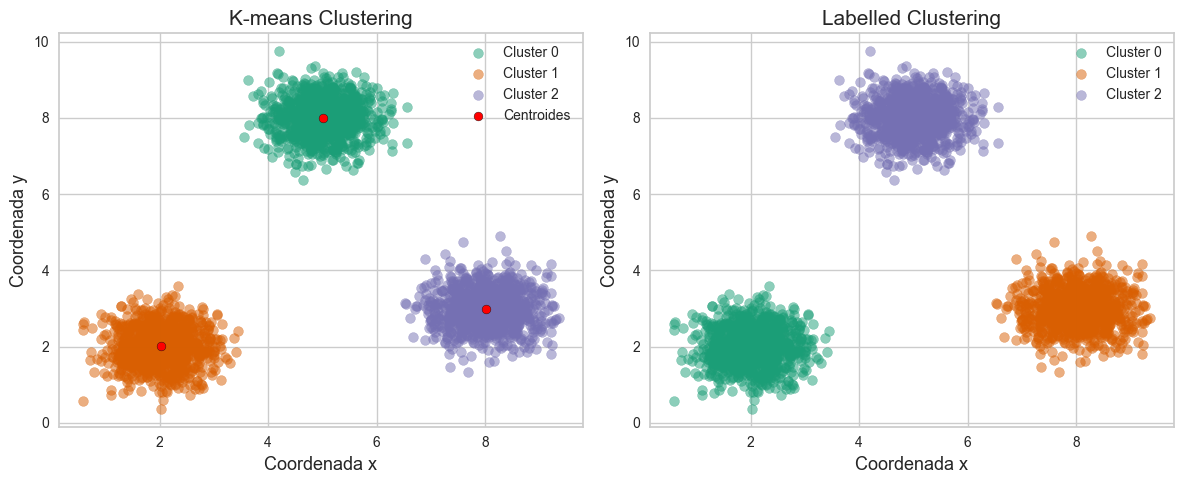

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']
unique_labels = set(groups)

# Gráfico 1. KMEANS
for i, label_value in enumerate(unique_labels):
    cluster_mask = (groups == label_value)
    ax1.scatter(df.loc[cluster_mask, "x"], df.loc[cluster_mask, "y"], color=colors(i), label=f'Cluster {label_value}', s=50, alpha=0.5)

ax1.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=40, color='red', edgecolor='k', label='Centroides')

ax1.set_title("K-means Clustering", fontsize=15)
ax1.set_xlabel('Coordenada x', fontsize=13)
ax1.set_ylabel('Coordenada y', fontsize=13)
ax1.grid(True)
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
# Obtener las etiquetas únicas de los clusters
df_labelled.cluster.replace({1: 0, 2: 1, 3:2}, inplace=True)  # Ajusta las etiquetas para que coincidan con las del modelo
unique_labels = set(df_labelled.cluster)

for i, label in enumerate(unique_labels):
    cluster_mask = (df_labelled['cluster'] == label)
    ax2.scatter(df_labelled.loc[cluster_mask, "x"], df_labelled.loc[cluster_mask, "y"], color=colors(i), label=f'Cluster {label}', s=50, alpha=0.5)

ax2.set_title("Labelled Clustering", fontsize=15)
ax2.set_xlabel('Coordenada x', fontsize=13)
ax2.set_ylabel('Coordenada y', fontsize=13)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Detección de outliers

In [67]:
# import numpy as np # type: ignore
# import pandas as pd # type: ignore
# import matplotlib.pyplot as plt # type: ignore
# from sklearn.cluster import KMeans # type: ignore

# N_INIT = 10 
# RANDOM_STATE = 100  
# ROW_NUMBERS = df.shape[0] # Calcular el número de filas en el DataFrame
# K = groups.max() + 1  # Se suma 1 porque los índices de los clusters empiezan en 0

# # Calcular SSE excluyendo cada observación
# SSE = []
# for excluded in range(ROW_NUMBERS):
#     # Eliminar la observación i
#     X_without_excluded = np.delete(df, excluded, axis=0)
    
#     # Aplicar K-medias a X_sin_i y obtener el índice SSE
#     model = KMeans(n_clusters=K, n_init=N_INIT, random_state=RANDOM_STATE).fit(X_without_excluded)
#     SSE.append(model.inertia_)

# # Detección visual de outliers
# plt.plot(np.arange(ROW_NUMBERS), SSE, "ko-") #  generar los valores de x e y para el gráfico
# plt.title("Índice SSE", fontsize=16)  
# plt.xlabel("Datos", fontsize=14)  
# plt.ylabel("SSE", fontsize=14)  
# plt.ylim(bottom=0)  # Límite inferior del eje y para asegurar que no se muestren valores negativos
# plt.show()

# # Detección analítica de outliers
# sigma = np.std(SSE)  # Calcular la desviación estándar de los valores SSE
# mu = np.mean(SSE)  # Calcular la media de los valores SSE
# umbral = 2  # Umbral para detectar outliers (2 para distribuciones normales)

# # Si la diferencia absoluta calculada es mayor que un múltiplo del umbral 
# # multiplicado por la desviación estándar (sigma) de los valores SSE, se considera que el índice i es un outlier.
# outliers = [i for i in range(ROW_NUMBERS) if np.abs(SSE[i] - mu) > umbral * sigma] 

# # Crear DataFrame para mostrar los outliers
# outliers_df = pd.DataFrame({'Index': outliers, 'SSE': [SSE[idx] for idx in outliers]})
# outliers_df

## 7. Validación interna - Evaluación de los clústers generados

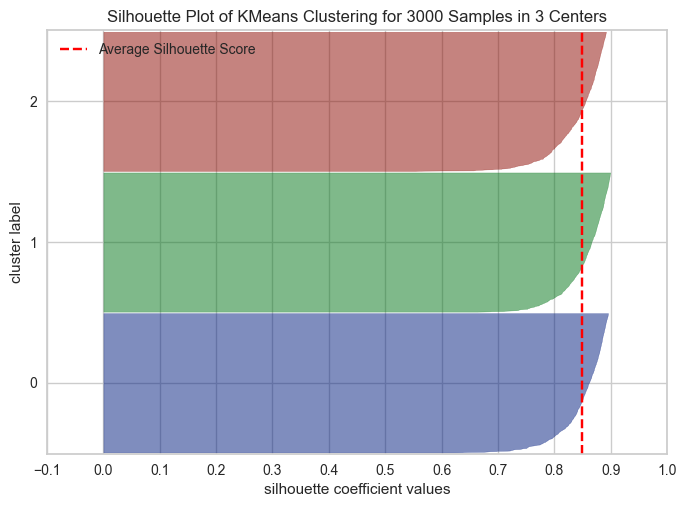

Silhouette Score: 0.849


In [68]:
from yellowbrick.cluster import SilhouetteVisualizer  # type: ignore
from sklearn.metrics import silhouette_score  # type: ignore
import warnings
warnings.filterwarnings("ignore")

visualizer = SilhouetteVisualizer(model, colors='sns_dark')
visualizer.fit(df)
visualizer.show()
plt.show()

print(f"Silhouette Score: {silhouette_score(df, groups):0.3}")

## 8. Validación externa - Comparación de los datos generados con 'ground truth'

In [69]:
external_validation_df = get_external_validation(groups, df_labelled.cluster)
external_validation_df

,Medida,Valor
0,Homogeneidad,1.0
1,Exhaustividad,1.0
2,Media armónica,1.0
3,Adjusted Rand Index,1.0
4,Mutual Information,1.0
